# TASK-2

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#Loading dataset
df=pd.read_csv("customers_data.csv")
df

,Customer_ID,Age,Gender,Product_ID,Review_Text,Rating,Sentiment,Purchase_Date,Location,Return_Status
0,CUST0001,58.0,Male,PROD666,"Amazing experience, will watch again.",4,Positive,2024-01-01,Chennai,Not Returned
1,CUST0002,25.0,Female,PROD399,"Excellent product, highly recommend!",5,Positive,2024-01-02,Bangalore,Returned
2,CUST0003,19.0,Male,PROD814,Terrible customer service.,5,Negative,2024-01-03,Delhi,Not Returned
3,CUST0004,65.0,Male,PROD229,Best product I’ve used this year.,4,Positive,2024-01-04,Delhi,Returned
4,CUST0005,35.0,Female,PROD753,Satisfied with the purchase.,5,Positive,2024-01-05,Delhi,Not Returned
...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,NaN,Other,PROD958,"Very bad experience, will not buy again.",4,Negative,2025-05-10,Mumbai,Returned
496,CUST0497,20.0,Male,PROD240,"Average quality, nothing special.",4,Positive,2025-05-11,Mumbai,Not Returned
497,CUST0498,41.0,Female,PROD743,Best product I’ve used this year.,4,Positive,2025-05-12,Chennai,Not Returned
498,CUST0499,55.0,NaN,PROD199,"Amazing experience, will watch again.",2,Negative,2025-05-13,Chennai,Not Returned


In [3]:
#printing shape of dataset
df.shape

(500, 10)

In [4]:
#checking column names in dataset
df.columns


Index(['Customer_ID', 'Age', 'Gender', 'Product_ID', 'Review_Text', 'Rating',
       'Sentiment', 'Purchase_Date', 'Location', 'Return_Status'],
      dtype='object')

In [5]:
#check missing values
df.isnull().sum()

Customer_ID       0
Age              25
Gender           25
Product_ID        0
Review_Text      25
Rating            0
Sentiment         0
Purchase_Date     0
Location         25
Return_Status     0
dtype: int64

In [6]:
#Handle missing Review_Text
df['Review_Text'].fillna("No review provided",inplace=True)
# Replace missing Age with median
df['Age'].fillna(df['Age'].median(),inplace=True)
# Replace missing Gender with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
# Replace missing Location with mode
df['Location'].fillna(df['Location'].mode()[0],inplace=True)


In [7]:
df.isnull().sum()

Customer_ID      0
Age              0
Gender           0
Product_ID       0
Review_Text      0
Rating           0
Sentiment        0
Purchase_Date    0
Location         0
Return_Status    0
dtype: int64

In [8]:
#Check sentiment value counts:
df['Sentiment'].value_counts()

Sentiment
Negative    282
Positive    177
Neutral      41
Name: count, dtype: int64

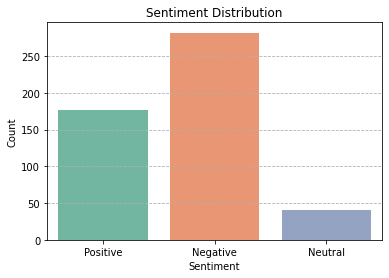

In [9]:
# Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='Set2',hue='Sentiment')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--')
plt.show()

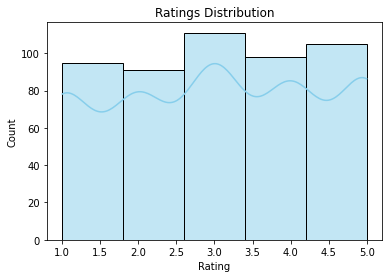

In [10]:
#Ratings Distribution of histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=5, kde=True, color='skyblue')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [11]:
#Convert Sentiment to Numeric Labels
df= df[df['Sentiment'] != 'Neutral']
df = df.assign(label=df['Sentiment'].map({'Positive': 1, 'Negative': 0}))

In [12]:
#Preprocess Text
import re
def clean_text(text):
    text=str(text).lower() #convert to lowercase
    text=re.sub(r'<.*?>','',text) #remove HTML tags
    text=re.sub(r'[^a-z\s]','',text) #remove punctuation and numbers
    text=re.sub(r'\s+','',text).strip() #remove extra spaces
    return text
# Apply to your review column
df['cleaned_review']=df['Review_Text'].apply(clean_text)

In [13]:
#TF-IDF Vectorization
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(df['cleaned_review'])
y=df['label']

In [14]:
#Split into Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(367, 14)
(367,)
(92, 14)
(92,)


In [15]:
# Train Logistic Regression Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
# Predict and Evaluate
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7934782608695652
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        60
           1       0.70      0.72      0.71        32

    accuracy                           0.79        92
   macro avg       0.77      0.78      0.77        92
weighted avg       0.80      0.79      0.79        92



In [17]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

confusion_matrix:
 [[50 10]
 [ 9 23]]
Precision: 0.696969696969697
Recall: 0.71875
F1 Score: 0.7076923076923077
